# Plume Labs - sensores electrónicos móviles de monitoreo de la calidad del aire

Este notebook muestra el proceso que se sigue para trabajar con los datos de los sensores electrónicos móviles de [Plume Labs](https://plumelabs.com/en/). Los datos con los que se trabaja fueron recopilados del portal de la api de Plume, verificados y procesados, y actualmente se encuentran guardados en la base de datos del proyecto [Prototipos de Infraestructura Pública para una Ciudad del Futuro](https://pipciudadfuturo.com/).

El notebook consta de las siguientes partes:

+ Librerías utilizadas
+ Descarga de datos
+ Análisis básicos y filtrado de datos
+ Visualización de datos
+ Guardado de datos

## Librerías

Para interactuar con la base de datos y generar el procesmiento de los diferentes datos hemos desarrollado una librería propia `aqiGDL` que almacena las diferentes funciones que son requeridas para el trabajo. Además de la librería desarrollada por [LAC](https://lac.mx) para el proyecto, también se utilizan otras librerías de python para el análisis y visualización de datos.

In [ ]:
import os
import sys
import osmnx as ox
import geopandas as gpd
import pandas as pd
import movingpandas as mpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aqiGDL
%matplotlib inline

### Estilos visuales
Utilizamos el estilo visual "Pitaya Smoothie" para la generación de gráficas.

In [ ]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
colors = ['7A76C2', 'ff6e9c98', 'f62196', '18c0c4', 'f3907e', '66E9EC']

## Descarga de datos

### Datos históricos de calidad del aire por viajes

Los datos históricos de exposición a contaminantes atmosféricos durante desplazamientos han sido descargados desde la api de Plume. Una vez descargados fueron procesados para representar el tipo de dato generado (estacionario o en movimiento) dependiendo del tiempo. Actualmente los datos limpios están disponibles desde la base de datos de PIP.


In [ ]:
gdf = aqiGDL.gdf_from_db('plumbe', 'public')
gdf

date  pollutants.no2.value  pollutants.no2.pi  \
0       1609642681                  0.00               0.00   
1       1609642741                  0.00               0.00   
2       1609642801                  0.00               0.00   
3       1609642861                  0.81               0.76   
4       1609642921                  1.73               1.63   
...            ...                   ...                ...   
318759  1625089919                  0.00               0.00   
318760  1625089979                  0.00               0.00   
318761  1625090039                  0.25               0.23   
318762  1625090099                  0.00               0.00   
318763  1625090159                  0.00               0.00   

        pollutants.voc.value  pollutants.voc.pi  pollutants.pm25.value  \
0                      122.0               9.76                  23.98   
1                      102.0               8.16                  21.89   
2                       95.0               7.60                  20.38   
3                       92.0               7.36                  17.82   
4                       91.0               7.28                  30.64   
...                      ...                ...                    ...   
318759                 243.0              19.44                   2.00   
318760                 249.0              19.92                   2.00   
318761                 248.0              19.84                   2.00   
318762                 247.0              19.76                   2.00   
318763                 246.0              19.68                   2.00   

        pollutants.pm25.pi  pollutants.pm10.value  pollutants.pm10.pi  \
0                    47.96                  24.98               24.98   
1                    43.78                  22.89               22.89   
2                    40.76                  21.38               21.38   
3                    35.63                  18.82               18.82   
4                    61.29                  31.64               31.64   
...                    ...                    ...                 ...   
318759                4.00                   3.00                3.00   
318760                4.00                   3.00                3.00   
318761                4.00                  26.38               26.38   
318762                4.00                   3.00                3.00   
318763                4.00                   3.00                3.00   

        pollutants.pm1.value  pollutants.pm1.pi       latitude     longitude  \
0                      16.49              41.22  963730.016934  2.359373e+06   
1                      14.12              35.29  963730.016934  2.359373e+06   
2                      13.37              33.42  963730.016934  2.359373e+06   
3                      11.62              29.04  963730.016934  2.359373e+06   
4                      22.74              56.85  963730.016934  2.359373e+06   
...                      ...                ...            ...           ...   
318759                  1.00               2.50  964003.558129  2.357253e+06   
318760                  1.00               2.50  964003.558129  2.357253e+06   
318761                  1.00               2.50  964003.558129  2.357253e+06   
318762                  1.00               2.50  964003.558129  2.357253e+06   
318763                  1.00               2.50  964003.558129  2.357253e+06   

         trip_type  group                        geometry     pi sensor_id  
0       stationary    0.0  POINT (2359372.642 963730.017)  47.96     13920  
1       stationary    0.0  POINT (2359372.642 963730.017)  43.78     13920  
2       stationary    0.0  POINT (2359372.642 963730.017)  40.76     13920  
3       stationary    0.0  POINT (2359372.642 963730.017)  35.63     13920  
4       stationary    0.0  POINT (2359372.642 963730.017)  61.29     13920  
...            ...    ...                             ...    ...    

## Análisis básicos y filtrado de datos

### Identificadores de sensores

Los datos se encuentran clasificados por tipo de viaje, en la columna "trip_type", hay dos clasificaciones, moving y stationary, en los que se encuentran clasificados como moving se consideraron como datos generados en movimiento y los de stationary no hubieron cambios de posición en el tiempo. Utilizando el tipo de viaje de moving se pueden observar los indicadores de los sensores que generaron viajes.

In [ ]:
gdf.loc[gdf.trip_type=='moving','sensor_id'].unique()

array(['13920', '14835', '14002', '13116', '13597', '14811', '13703',
       '14204', '14834', '13093', '13595', '13638', '14669', '13335',
       '13178', '13684', '15602', '14618', '13949', '14794', '13946',
       '14700'], dtype=object)

### Información de contaminantes por registro

Si observamos las columnas que están dentro de nuestro GeoDataFrame podemos ver a los datos que tenemos acceso. De estos, 'pollutants.no2.value', 'pollutants.no2.pi', 'pollutants.voc.value', 'pollutants.voc.pi', 'pollutants.pm25.value', 'pollutants.pm25.pi', 'pollutants.pm10.value', 'pollutants.pm10.pi', 'pollutants.pm1.value', 'pollutants.pm1.pi' son datos de contaminantes en el recorrido, donde value es para concentraciones y pi es para un índice de contaminación.

In [ ]:
gdf.columns

Index(['date', 'pollutants.no2.value', 'pollutants.no2.pi',
       'pollutants.voc.value', 'pollutants.voc.pi', 'pollutants.pm25.value',
       'pollutants.pm25.pi', 'pollutants.pm10.value', 'pollutants.pm10.pi',
       'pollutants.pm1.value', 'pollutants.pm1.pi', 'latitude', 'longitude',
       'trip_type', 'group', 'geometry', 'pi', 'sensor_id'],
      dtype='object')

### Tipos de datos

Por su parte, con .dtypes podemos analizar qué tipo de datos contiene cada columna.

In [ ]:
gdf.dtypes

date                        int64
pollutants.no2.value      float64
pollutants.no2.pi         float64
pollutants.voc.value      float64
pollutants.voc.pi         float64
pollutants.pm25.value     float64
pollutants.pm25.pi        float64
pollutants.pm10.value     float64
pollutants.pm10.pi        float64
pollutants.pm1.value      float64
pollutants.pm1.pi         float64
latitude                  float64
longitude                 float64
trip_type                  object
group                     float64
geometry                 geometry
pi                        float64
sensor_id                  object
dtype: object

### Descripción de los datos

Con describe podemos observar los datos de nuestro GeoDataFrame y observar estadísticas básicas para entender un poco sobre la distribución que tienen.

In [ ]:
gdf.describe()

date  pollutants.no2.value  pollutants.no2.pi  \
count  3.187640e+05         318764.000000      318764.000000   
mean   1.618299e+09             26.202612          21.908056   
std    5.185004e+06             69.784880          42.839789   
min    1.608493e+09              0.000000           0.000000   
25%    1.613912e+09              2.169663           2.040000   
50%    1.618484e+09             10.290000           9.690000   
75%    1.622232e+09             22.794641          22.203186   
max    1.625570e+09            965.170000         504.020000   

       pollutants.voc.value  pollutants.voc.pi  pollutants.pm25.value  \
count         318764.000000      318764.000000          318764.000000   
mean             239.907452          16.604068               5.003052   
std              410.901455          16.560235              11.815004   
min                3.000000           0.240000               2.000000   
25%              129.142857          10.331429               2.000000   
50%              163.000000          13.040000               2.080000   
75%              205.000000          16.400000               4.720000   
max            23936.000000         463.930000             673.600000   

       pollutants.pm25.pi  pollutants.pm10.value  pollutants.pm10.pi  \
count       318764.000000          318764.000000       318764.000000   
mean             9.692274              16.399549           16.593148   
std             14.737643              32.513494           29.668730   
min              4.000000               3.000000            3.000000   
25%              4.000000               3.000000            3.000000   
50%              4.160000               4.740000            4.740000   
75%              9.440000              16.510000           16.540000   
max            500.000000             885.740000          500.000000   

       pollutants.pm1.value  pollutants.pm1.pi      latitude     longitude  \
count         318764.000000      318764.000000  3.187640e+05  3.187640e+05   
mean               2.898367           6.861694  9.555266e+05  2.464652e+06   
std                8.577245          11.263938  4.115560e+04  3.474546e+05   
min                1.000000           2.500000  7.842417e+05  2.347990e+06   
25%                1.000000           2.500000  9.605480e+05  2.357434e+06   
50%                1.000000           2.500000  9.631420e+05  2.358118e+06   
75%                2.210000           5.530000  9.638251e+05  2.364606e+06   
max              499.640000         181.140000  1.086298e+06  4.064712e+06   

               group             pi  
count  318764.000000  318764.000000  
mean      114.486187      39.884714  
std       198.564642      47.093021  
min         0.000000       4.000000  
25%         0.000000      15.093333  
50%         0.000000      22.760000  
75%       187.000000      44.500000  
max       986.000000     504.020000

### Filtrado de datos

Si seleccionamos un identificador de sensor y un tipo de viaje "moving" podemos filtrar nuestro GeoDataFrame y visualizar los datos que se han generado en viajes por ese sensor.

In [ ]:
gdf_aq = gdf.loc[(gdf.sensor_id=='14700')&(gdf.trip_type=='moving')]
gdf_aq = gdf_aq.to_crs("EPSG:4326")

In [ ]:
gdf_aq.head(2)

date  pollutants.no2.value  pollutants.no2.pi  \
315275  1625021397                24.565             24.665   
315305  1625023197                 1.775              1.670   

        pollutants.voc.value  pollutants.voc.pi  pollutants.pm25.value  \
315275                 161.0              12.88                    2.0   
315305                 159.0              12.72                    2.0   

        pollutants.pm25.pi  pollutants.pm10.value  pollutants.pm10.pi  \
315275                 4.0                 13.540              13.540   
315305                 4.0                  9.235               9.235   

        pollutants.pm1.value  pollutants.pm1.pi       latitude     longitude  \
315275                   1.0                2.5  964013.340715  2.357256e+06   
315305                   1.0                2.5  964013.340715  2.357256e+06   

       trip_type  group                     geometry      pi sensor_id  
315275    moving    2.0  POINT (-103.37583 20.67706)  24.665     14700  
315305    moving    3.0  POINT (-103.37583 20.67706)  12.720     14700

### Viajes

Los viajes que se generan con el sensor se identifican por grupos para separar los tiempos en los que se registraron los valores.

In [ ]:
gdf_aq.group.unique()

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34.])

## Visualización de datos

Con la función de graph_plume podemos hacer visualizaciones de distintos viajes agregando argumentos como el GeoDataFrame que se descarga desde la base de datos de PIP, el identificador del sensor que se desea estudiar, el viaje (grupo) que se desea visualizar (como se mostró en la celda previa) y lo que se busca representar (lo que se muestra en la sección de información de contaminantes por registro), el parámetro n se utiliza para numerar el viaje analizado, automáticamente se coloca como 1. Por último, save=True nos permite guardar el resultado.

In [ ]:
def graph_plumbe (g, sensor, gdf_aq, pi, n, save=False):
    gdf_aq = gdf_aq.to_crs("EPSG:4326")
    xmin = gdf_aq.loc[gdf_aq.group==g].geometry.x.min()-0.02
    xmax = gdf_aq.loc[gdf_aq.group==g].geometry.x.max()+0.02
    ymin = gdf_aq.loc[gdf_aq.group==g].geometry.y.min()-0.02
    ymax = gdf_aq.loc[gdf_aq.group==g].geometry.y.max()+0.02
    G = ox.graph_from_bbox(ymax,ymin, xmax, xmin)
    edges = ox.graph_to_gdfs(G, nodes=False)
    traj_aq = mpd.Trajectory(gdf_aq.loc[gdf_aq.group==g], 1)

    xdif = xmax-xmin
    ydif = ymax-ymin

    ratio = ydif/xdif

    if ratio > 1:
        size = (int(8*ratio),8)
    else:
        size = (8, int(8/ratio))

    fig, axes = plt.subplots(1,1,figsize=size)

    fig.suptitle(f'Trip: {n}', fontsize=20)

    date = pd.to_datetime(gdf_aq.loc[gdf_aq.group==g]['date'],errors='coerce', unit='s')
    date = date.dt.strftime("%Y-%m-%d")

    axes.set_title(f'Sensor: {sensor}\n{date.unique()[0]}', fontsize=15)

    axes.grid(False)

    edges.plot(ax=axes, color='#e8e9eb',linewidth=0.1, zorder=-1)
    edges[(edges['highway']=='primary') | (edges['highway']=='secondary')].plot(ax=axes, color='#e8e9eb',linewidth=0.5, zorder=0)
    traj_aq.plot(ax=axes, column=pi, linewidth=4, capstyle='round', zorder=1)
    axes.axis('off')
    
    if save==True:
        plt.savefig(f'Sensor: {sensor}\n{date.unique()[0]}.png', dpi=300)
    
    return plt.show()

### Ejemplo

Utilizando el sensor 14700, el viaje número 20 y los valores de contaminación del índice de contaminación por Material Particulado Menor a 10 Micras (PM10) se obtiene el siguiente resultado.

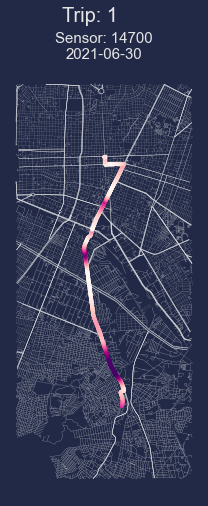

In [ ]:
g = 20
sensor = 14700
n = 1
pi = 'pollutants.pm10.pi'
graph_plumbe (g, sensor, gdf_aq, pi, n, save=False)

### Pruebas

Puedes agregar distintos sensores y probar con viajes (o grupos) para observar cuál fue la exposición a contaminantes atomsféricos en cada caso, sin embargo, por la forma en que Plume registra los datos se generan viajes con un único valor o con pocos valores que no se logran representar de forma apropiada. Por lo tanto, es posible que algunos ajustes presenten un error o no generen una visualización óptima.

Para guardar las figuras resultantes es posible cambiar save a True.

In [ ]:
sensor = ##
g = ##
pi = '..'
n = #
graph_plume (sensor, g, pi,gdf_aq, n, save=False)

## Guardado de datos

Para guardar la base de datos completa se puede utilizar gdf.to_file(), sin embargo, si se hace un filtrado de datos (como el que se muestra en gdf_aq) se puede utilizar to_file para guardar solo los datos de interés.

### GeoJSON
Es posible guardar el GeoDataFrame como un geojson, que es un formato de tabla con información espacial, el nombre del archivo lo podemos asignar en la variable name.

In [ ]:
name = '..'

gdf.to_file(f'{name}_GeoDataFrame.geojson',driver='GeoJSON')

### csv
También, es posible guardar el GeoDataFrame como una tabla csv, al igual que en el GeoJSON, el nombre del archivo lo podemos asignar en la variable name.

In [ ]:
name = '..'

gdf.to_csv(f'{name}_.csv')